In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pylab import rcParams
import calendar
from datetime import datetime, timedelta
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

def days_in_month(dt):
    return calendar.monthrange(dt.year, dt.month)[1]


def monthly_range(dt_start, dt_end):
    forward = dt_end >= dt_start
    finish = False
    dt = dt_start

    while not finish:
        yield dt
        if forward:
            days = days_in_month(dt)
            dt = dt + timedelta(days=days)
            finish = dt > dt_end
        else:
            _tmp_dt = dt.replace(day=1) - timedelta(days=1)
            dt = (_tmp_dt.replace(day=dt.day))
            finish = dt < dt_end

rcParams['figure.figsize'] = 16,4
df = pd.read_csv('database.csv', low_memory=False)
df.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [5]:
states_total = df[['State', 'Incident']]
states_total = states_total.groupby(['State'],as_index=False).sum()
states_total.columns = ['State', 'Incident']
states_total = states_total.sort_values(['Incident'], ascending=[True])
states_total

,State,Incident
34,North Dakota,314
45,Vermont,503
41,South Dakota,556
26,Montana,640
50,Wyoming,720
29,New Hampshire,763
19,Maine,907
12,Idaho,1209
7,Delaware,1592
39,Rhodes Island,2080


In [70]:
states_total.Incident.head()

34    314
45    503
41    556
26    640
50    720
Name: Incident, dtype: int64

In [71]:
states_total.Incident.mean()

287528.68627450982

In [72]:
states_total.Incident.std()

1183818.7694157832

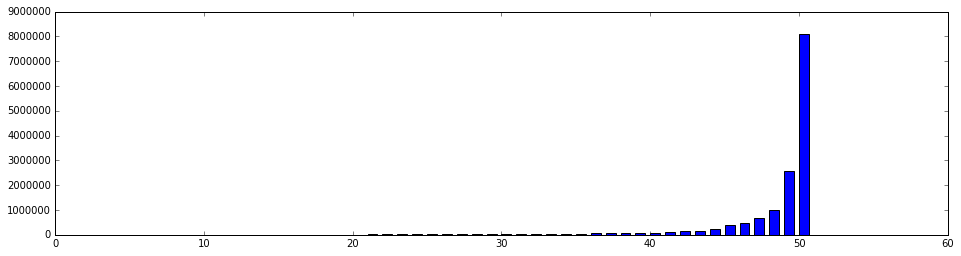

In [86]:
width = 1/1.5
plt.bar(range(51), states_total.Incident, width, color="blue")
plt.show()

In [75]:
states = df[['Year', 'State', 'Incident']]
states = states.groupby(['Year', 'State'], as_index=False)['Incident'].sum()
states.head()

,Year,State,Incident
0,1980,Alabama,1207
1,1980,Alaska,79
2,1980,Arizona,854
3,1980,Arkansas,348
4,1980,California,55509


In [79]:
s = pd.pivot_table(states,index=["State", "Year"])
alabama = s.query('State == ["Alabama"]')
alabama = alabama.reset_index()
alabama
alabama = alabama[['Incident']]
alabama.Incident

0      1207
1      1034
2       982
3       684
4       705
5       893
6      1088
7       630
8       901
9      1019
10     1366
11     1463
12    10692
13     1316
14     1603
15     1347
16     1199
17     1065
18      774
19       20
20     1163
21      734
22      601
23      749
24      502
25      924
26      955
27      929
28      763
29      581
30      255
31        2
32        2
33        1
Name: Incident, dtype: int64

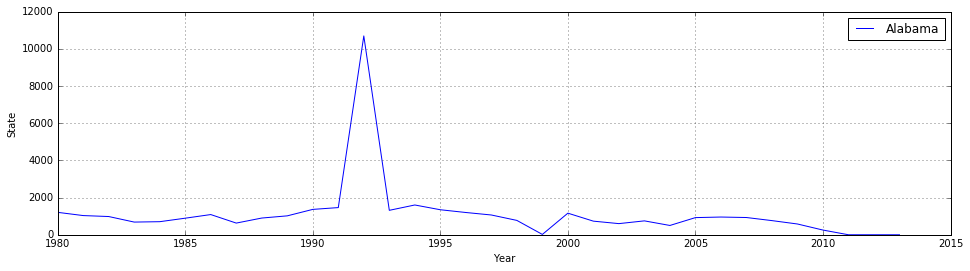

In [82]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(range(1980, 2014), alabama.Incident, linestyle='-', label="{}".format('Alabama'))
plt.legend(loc='best')
plt.ylabel('State')
plt.xlabel('Year')
plt.grid()
plt.show()

In [19]:
states_list = list(states_total.State)
states_list

['North Dakota',
 'Vermont',
 'South Dakota',
 'Montana',
 'Wyoming',
 'New Hampshire',
 'Maine',
 'Idaho',
 'Delaware',
 'Rhodes Island',
 'Iowa',
 'Utah',
 'Hawaii',
 'Nebraska',
 'Alaska',
 'West Virginia',
 'Kansas',
 'Oregon',
 'Minnesota',
 'Connecticut',
 'New Mexico',
 'Mississippi',
 'Washington',
 'Arkansas',
 'South Carolina',
 'Massachusetts',
 'Kentucky',
 'Colorado',
 'Wisconsin',
 'Nevada',
 'Virginia',
 'North Carolina',
 'New Jersey',
 'Oklahoma',
 'Alabama',
 'Indiana',
 'Arizona',
 'Ohio',
 'Georgia',
 'Tennessee',
 'Missouri',
 'Louisiana',
 'District of Columbia',
 'Maryland',
 'Pennsylvania',
 'Michigan',
 'Texas',
 'Illinois',
 'California',
 'New York',
 'Florida']

In [20]:
my_series = pd.DataFrame()
s = pd.pivot_table(df,index=["State", "Year"], values=["Incident"], aggfunc=[np.sum])

for i in range(0,51):
    state = states_list[i]
    x = s.query('State == ["{}"]'.format(state))
    my_series[state] = pd.Series(x['sum']['Incident'].values)

my_series['Alabama'] = my_series['Alabama'].fillna(0)
my_series['Alabama']

0      1207.0
1      1034.0
2       982.0
3       684.0
4       705.0
5       893.0
6      1088.0
7       630.0
8       901.0
9      1019.0
10     1366.0
11     1463.0
12    10692.0
13     1316.0
14     1603.0
15     1347.0
16     1199.0
17     1065.0
18      774.0
19       20.0
20     1163.0
21      734.0
22      601.0
23      749.0
24      502.0
25      924.0
26      955.0
27      929.0
28      763.0
29      581.0
30      255.0
31        2.0
32        2.0
33        1.0
34        0.0
Name: Alabama, dtype: float64

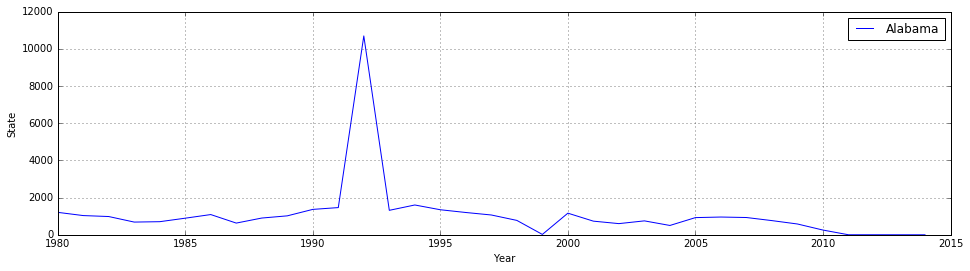

In [63]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(range(1980, 2015), my_series['Alabama'], linestyle='-', label="{}".format('Alabama'))
plt.legend(loc='best')
plt.ylabel('State')
plt.xlabel('Year')
plt.grid()
plt.show()

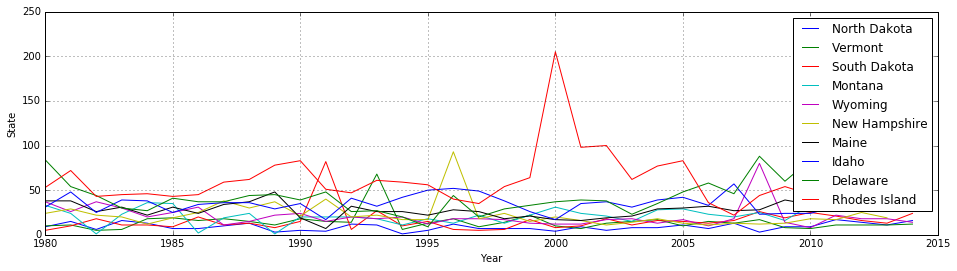

In [62]:
# Plot several state time series
fig = plt.figure()
ax = plt.subplot(111)
for i in range(0,10):
    state = states_list[i]
    ax.plot(range(1980, 2015), my_series[state], linestyle='-', label="{}".format(state))
plt.legend(loc='best')
plt.ylabel('State')
plt.xlabel('Year')
plt.grid()
plt.show()

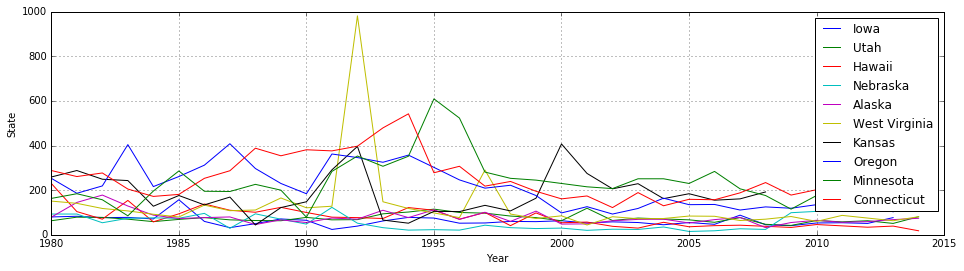

In [61]:
# Plot several state time series
fig = plt.figure()
ax = plt.subplot(111)
for i in range(10,20):
    state = states_list[i]
    ax.plot(range(1980, 2015), my_series[state], linestyle='-', label="{}".format(state))
plt.legend(loc='best')
plt.ylabel('State')
plt.xlabel('Year')
plt.grid()
plt.show()

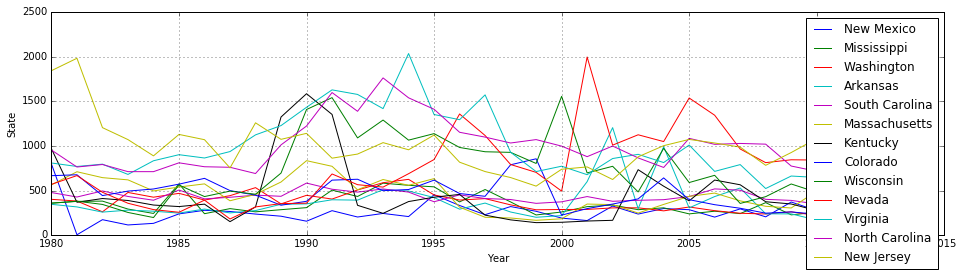

In [60]:
# Plot several state time series
fig = plt.figure()
ax = plt.subplot(111)
for i in range(20,33):
    state = states_list[i]
    ax.plot(range(1980, 2015), my_series[state], linestyle='-', label="{}".format(state))
plt.legend(loc='best')
plt.ylabel('State')
plt.xlabel('Year')
plt.grid()
plt.show()

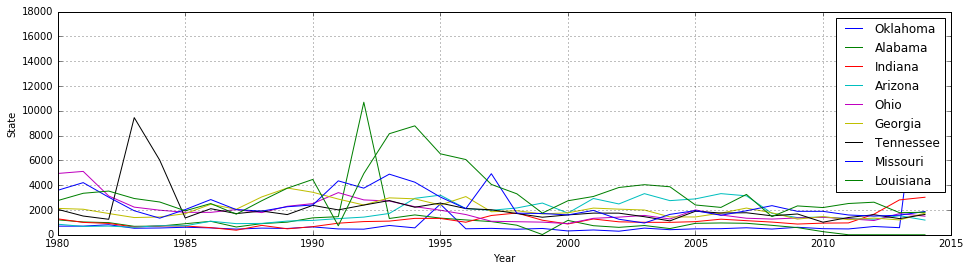

In [59]:
# Plot several state time series
fig = plt.figure()
ax = plt.subplot(111)
for i in range(33,42):
    state = states_list[i]
    ax.plot(range(1980, 2015), my_series[state], linestyle='-', label="{}".format(state))
plt.legend(loc='best')
plt.ylabel('State')
plt.xlabel('Year')
plt.grid()
plt.show()

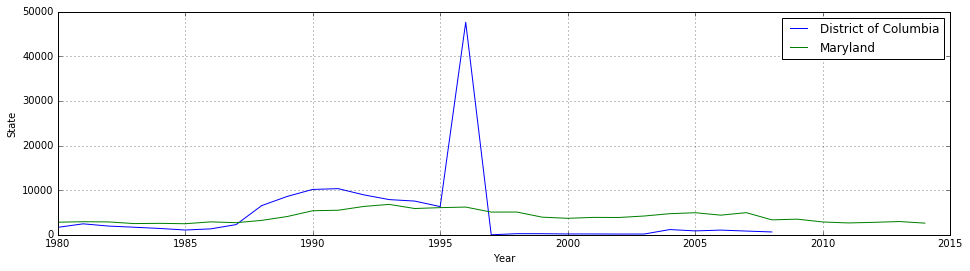

In [58]:
# Plot several state time series
fig = plt.figure()
ax = plt.subplot(111)
for i in range(42,44):
    state = states_list[i]
    ax.plot(range(1980, 2015), my_series[state], linestyle='-', label="{}".format(state))
plt.legend(loc='best')
plt.ylabel('State')
plt.xlabel('Year')
plt.grid()
plt.show()

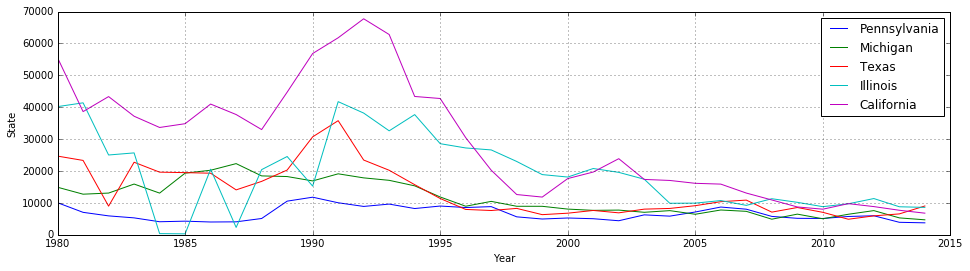

In [57]:
# Plot several state time series
fig = plt.figure()
ax = plt.subplot(111)
for i in range(44,49):
    state = states_list[i]
    ax.plot(range(1980, 2015), my_series[state], linestyle='-', label="{}".format(state))
plt.legend(loc='best')
plt.ylabel('State')
plt.xlabel('Year')
plt.grid()
plt.show()

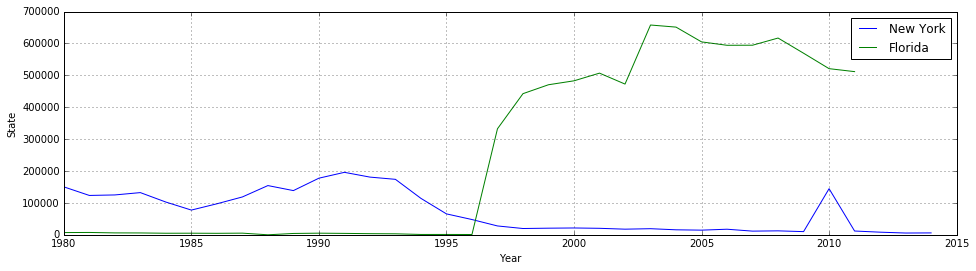

In [56]:
# Plot several state time series
fig = plt.figure()
ax = plt.subplot(111)
for i in range(49,51):
    state = states_list[i]
    ax.plot(range(1980, 2015), my_series[state], linestyle='-', label="{}".format(state))
plt.legend(loc='best')
plt.ylabel('State')
plt.xlabel('Year')
plt.grid()
plt.show()